In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import analysis
import random
import numpy as np
import os

In [2]:
dataset_dict = {"HCV":(["A", "B", "C", "D"], [1, 2, 3, 2]),
               "HCV_1":(["A", "B", "C", "D"], [6, 4, 5, 2]),
               "HCV_2":(["A", "B", "C", "D"], [10, 2, 8, 2])}
print(dataset_dict)

{'HCV': (['A', 'B', 'C', 'D'], [1, 2, 3, 2]), 'HCV_1': (['A', 'B', 'C', 'D'], [6, 4, 5, 2]), 'HCV_2': (['A', 'B', 'C', 'D'], [10, 2, 8, 2])}


0.4


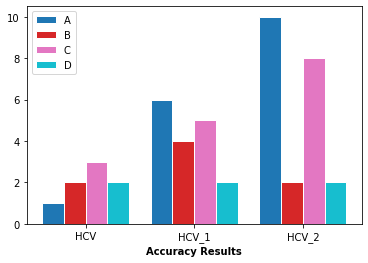

In [3]:
analysis.plot_barchart(dataset_dict)

In [4]:
dataset = "../Results/lr_0.01_epoch_2000_stop_300_gc_[10,10,]_do_0.2_ad_10_ab_1_fc_[20,20,]_m_gcn_cheby_deg_3.protease_HCV_selector_k_nearest_ratio_0_params_3.{}.csv"
att = dataset.format("attentions")
pred = dataset.format("predictions")
epoch = dataset.format("epoch")
silent_dir = "/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV"

In [5]:
analysis.classification_report(pred)

              precision    recall  f1-score   support

     CLEAVED      0.840     0.880     0.860       567
   UNCLEAVED      0.958     0.942     0.950      1636

    accuracy                          0.926      2203
   macro avg      0.899     0.911     0.905      2203
weighted avg      0.927     0.926     0.927      2203



0.9260099863822061

Normalized confusion matrix
[[0.88007055 0.11992945]
 [0.05806846 0.94193154]]


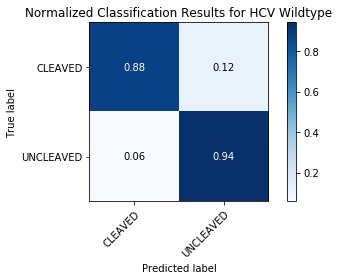

In [6]:
analysis.plot_confusion_matrix(pred, normalize = True, title = "Normalized Classification Results for HCV Wildtype")

In [7]:
analysis.attention_average(att, pred, silent_dir, 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-469822086 seed_offset=0 real_seed=-469822086
core.init.random: RandomGenerator:init: Normal mode, seed=-469822086 RG_type=mt19937
core.io.silent.SilentFileData: Reading all structures from /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRos

ValueError: Non matching dimensions

In [ ]:
analysis.plot_auc(pred)

In [ ]:
analysis.plot_aupr(pred)

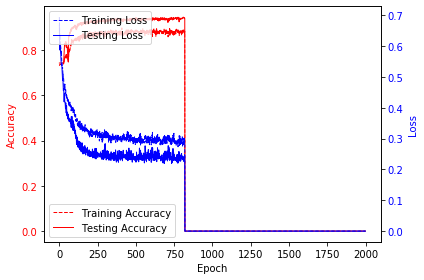

In [11]:
analysis.plot_progression(epoch)

In [12]:
analysis.attention_command(att, silent_dir, "ADVDARC.ASHL", 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-1696513748 seed_offset=0 real_seed=-1696513748
core.init.random: RandomGenerator:init: Normal mode, seed=-1696513748 RG_type=mt19937
Silent file for ADVDARC.ASHL not found /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV/ADVD__C.

AttributeError: 'str' object has no attribute 'num_chains'

In [13]:
template = "../Results/lr_0.01_epoch_600__gc_[10,10,]_do_0.0_ad_10_ab_3_fc_[]_m_gcn_cheby_deg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_{}_selector_8_ang_ratio_0_params_3.{}.csv"
mutants = ["HCV_A171T", "HCV_R170K_A171T_D183A", "HCV_D183A"]

for m in mutants:
    try:
        pred = template.format(m, "predictions")
        epoch = template.format(m, "epoch")
        analysis.classification_report(pred)
        analysis.plot_confusion_matrix(pred, normalize = True, title = "Normalized Classification Results for {}".format(m))
        analysis.plot_auc(pred, m)
        analysis.plot_aupr(pred, m)
    except:
        pass

              precision    recall  f1-score   support

     CLEAVED      0.890     0.998     0.941       567
   UNCLEAVED      0.999     0.957     0.978      1636

    accuracy                          0.968      2203
   macro avg      0.945     0.978     0.959      2203
weighted avg      0.971     0.968     0.968      2203



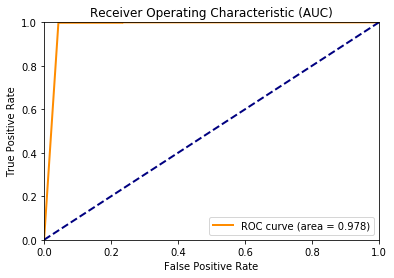

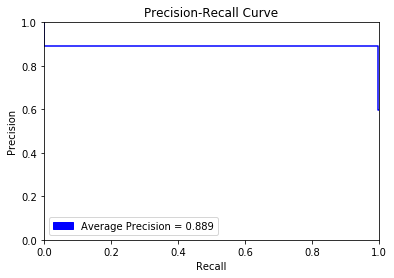

              precision    recall  f1-score   support

     CLEAVED      0.827     0.825     0.826       567
   UNCLEAVED      0.940     0.940     0.940      1636

    accuracy                          0.911      2203
   macro avg      0.883     0.883     0.883      2203
weighted avg      0.911     0.911     0.911      2203



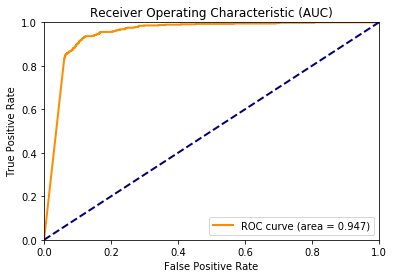

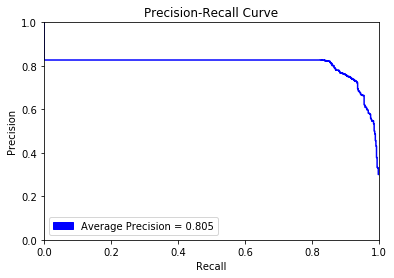

              precision    recall  f1-score   support

     CLEAVED      0.960     0.886     0.922      1073
   UNCLEAVED      0.959     0.986     0.972      2890

    accuracy                          0.959      3963
   macro avg      0.959     0.936     0.947      3963
weighted avg      0.959     0.959     0.959      3963



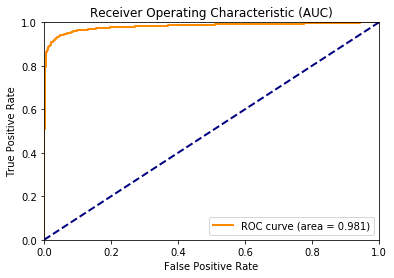

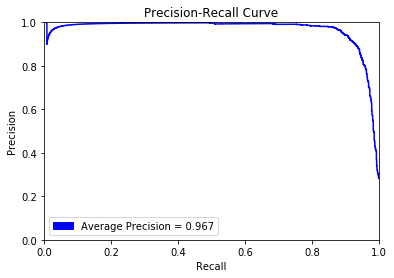

              precision    recall  f1-score   support

     CLEAVED      0.832     0.874     0.852      1288
   UNCLEAVED      0.927     0.900     0.913      2272

    accuracy                          0.890      3560
   macro avg      0.879     0.887     0.883      3560
weighted avg      0.892     0.890     0.891      3560



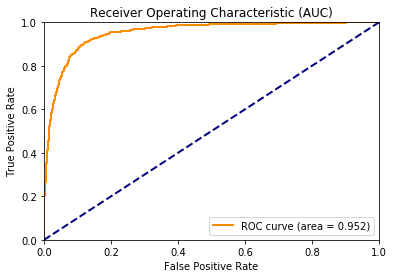

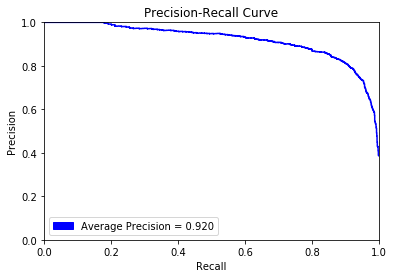

              precision    recall  f1-score   support

     CLEAVED      0.927     0.964     0.945      1288
   UNCLEAVED      0.979     0.957     0.968      2272

    accuracy                          0.960      3560
   macro avg      0.953     0.961     0.957      3560
weighted avg      0.960     0.960     0.960      3560



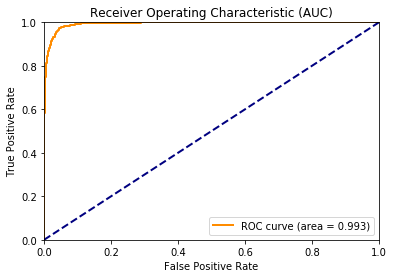

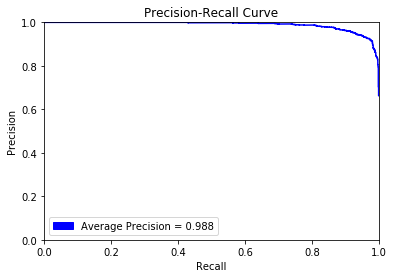

              precision    recall  f1-score   support

     CLEAVED      0.996     0.989     0.993       938
   UNCLEAVED      0.991     0.996     0.994      1114

    accuracy                          0.993      2052
   macro avg      0.993     0.993     0.993      2052
weighted avg      0.993     0.993     0.993      2052



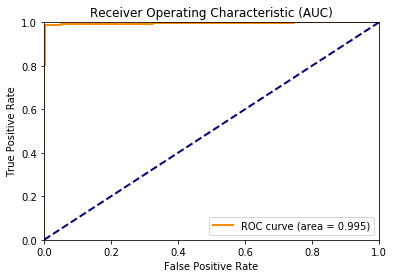

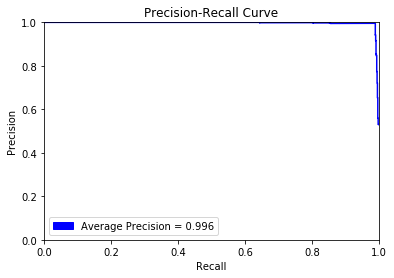

              precision    recall  f1-score   support

     CLEAVED      0.990     0.991     0.991       938
   UNCLEAVED      0.993     0.992     0.992      1114

    accuracy                          0.992      2052
   macro avg      0.992     0.992     0.992      2052
weighted avg      0.992     0.992     0.992      2052



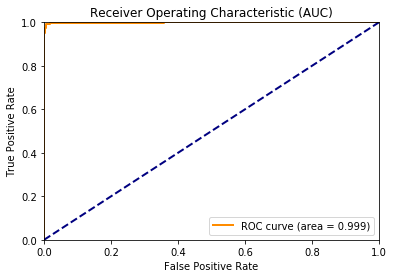

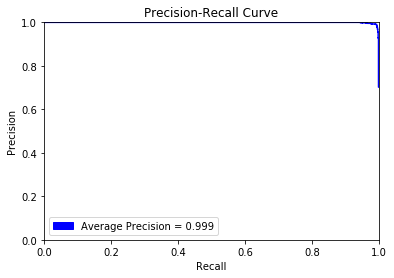

'# add results from group model\nfor p in protease:\n    acc = []\n    auc = []\n    aupr = []\n    for n in neighborhoods:\n        results_relevant = [f for f in all_results if is_rel(f,n,p)]\n        if len(results_relevant) != 3:\n            print(results_relevant)\n            raise ValueError("Parsing is wrong")\n        pred = [x for x in results_relevant if "predictions" in x][0]\n        acc.append(analysis.classification_report(pred, protease = p))\n        auc.append(analysis.plot_auc(pred, protease = p))\n        aupr.append(analysis.plot_aupr(pred, protease = p))\n    # add all values to each plot\n    n_ind = [f"{n} Grouped" for n in neighborhoods]\n    dictionary_acc[p] = (n_ind, acc)\n    dictionary_aupr[p] = (n_ind, aupr)\n    dictionary_auc[p] = (n_ind, auc)'

In [2]:
# this gets aupr, accuracy, and auc for the testing set (all neighborhood sizes), together and apart
neighborhoods = ["10_ang", "8_ang", "k_nearest"] 
protease = ['HCV', 'HCV_A171T', 'HCV_D183A', 'HCV_R170K_A171T_D183A']
dictionary_acc = {}
dictionary_aupr = {}
dictionary_auc = {}
all_results = os.listdir("../Results")

def is_rel(f,n,p):
    if n in f:
        if f"protease_{p}_selector" in f:
            return True
    return False

# add all individual results
for p in protease:
    acc = []
    auc = []
    aupr = []
    for n in neighborhoods:
        results_relevant = [f for f in all_results if is_rel(f,n,p)]
        if len(results_relevant) != 3:
            acc.append(0)
            auc.append(0)
            aupr.append(0)
        else:
            pred = [x for x in results_relevant if "prediction" in x][0]
            epoch = [x for x in results_relevant if "epoch.cs" in x][0]
            acc.append(analysis.classification_report(f"../Results/{pred}"))
            auc.append(analysis.plot_auc(f"../Results/{pred}"))
            aupr.append(analysis.plot_aupr(f"../Results/{pred}"))
            #analysis.plot_progression(f"../Results/{epoch}")
    # add all values to each plot
    n_ind = [f"{n} Individual" for n in neighborhoods]
    dictionary_acc[p] = (n_ind, acc)
    dictionary_aupr[p] = (n_ind, aupr)
    dictionary_auc[p] = (n_ind, auc)
    
"""# add results from group model
for p in protease:
    acc = []
    auc = []
    aupr = []
    for n in neighborhoods:
        results_relevant = [f for f in all_results if is_rel(f,n,p)]
        if len(results_relevant) != 3:
            print(results_relevant)
            raise ValueError("Parsing is wrong")
        pred = [x for x in results_relevant if "predictions" in x][0]
        acc.append(analysis.classification_report(pred, protease = p))
        auc.append(analysis.plot_auc(pred, protease = p))
        aupr.append(analysis.plot_aupr(pred, protease = p))
    # add all values to each plot
    n_ind = [f"{n} Grouped" for n in neighborhoods]
    dictionary_acc[p] = (n_ind, acc)
    dictionary_aupr[p] = (n_ind, aupr)
    dictionary_auc[p] = (n_ind, auc)"""

In [3]:
import pprint
pprint.pprint(dictionary_acc)
pprint.pprint(dictionary_auc)
pprint.pprint(dictionary_aupr)

{'HCV': (['10_ang Individual', '8_ang Individual', 'k_nearest Individual'],
         [0, 0.9677712210621879, 0.9105764866091693]),
 'HCV_A171T': (['10_ang Individual',
                '8_ang Individual',
                'k_nearest Individual'],
               [0, 0, 0.9591218773656321]),
 'HCV_D183A': (['10_ang Individual',
                '8_ang Individual',
                'k_nearest Individual'],
               [0, 0.8904494382022472, 0.9595505617977528]),
 'HCV_R170K_A171T_D183A': (['10_ang Individual',
                            '8_ang Individual',
                            'k_nearest Individual'],
                           [0, 0.99317738791423, 0.9917153996101364])}
{'HCV': (['10_ang Individual', '8_ang Individual', 'k_nearest Individual'],
         [0, 0.9782312001138407, 0.947491515849299]),
 'HCV_A171T': (['10_ang Individual',
                '8_ang Individual',
                'k_nearest Individual'],
               [0, 0, 0.981392274030384]),
 'HCV_D183A': (['10_ang Indi

0.375


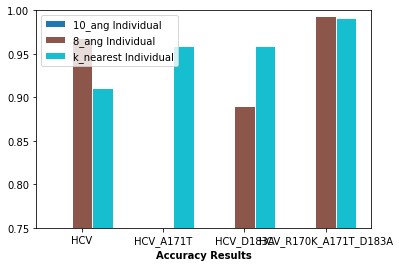

0.375


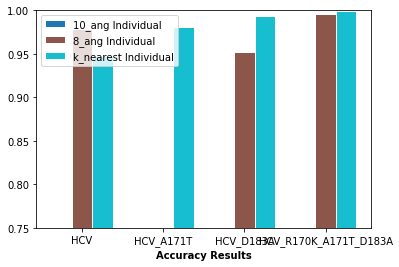

0.375


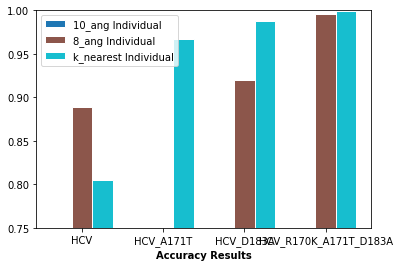

In [4]:
analysis.plot_barchart(dictionary_acc)
analysis.plot_barchart(dictionary_auc)
analysis.plot_barchart(dictionary_aupr)